<img src="https://upload.wikimedia.org/wikipedia/commons/6/6a/ITESO_logo.png" alt="Logo ITESO" width="200"/>



 # Optimización de la Eficiencia en Celdas Solares de Nanomateriales

Laura Belén Rodríguez Rodríguez  28-11-24 

## Introduccion 

Este proyecto busca optimizar la eficiencia de una celda solar de silicio mediante la aplicación de nanomateriales antirreflejantes. El objetivo es reducir la reflectancia de la superficie y maximizar la absorción de fotones, lo que permitirá incrementar la corriente de cortocircuito y la potencia máxima generada. Este trabajo tiene implicaciones en la mejora del rendimiento energético
## Marco teorico 

Celdas solares de unión p-n: Explicación del principio de funcionamiento, generación de pares electrón-hueco y transporte de carga.

Nanomateriales antirreflejantes: Propiedades ópticas de materiales como el dióxido de silicio (SiO₂) y su papel en la disminución de la reflectancia.

Eficiencia en celdas solares: Conceptos clave como el factor de llenado (FF), corriente de cortocircuito (Isc), voltaje de circuito abierto (Voc) y potencia máxima (Pmax).

Función no convexa: La eficiencia depende de múltiples variables no lineales, como el espesor de la capa antirreflejante, las propiedades dieléctricas y las condiciones de iluminación.

## Objetivos

Generales:

Incrementar la eficiencia de una celda solar mediante el diseño y optimización de una capa antirreflejante.

Específicos:

Diseñar una celda solar de unión p-n con contactos metálicos y nanomateriales antirreflejantes.

Modelar matemáticamente la función de eficiencia de la celda como una función no convexa.

Determinar el espesor óptimo de la capa antirreflejante para maximizar la eficiencia.

Comparar los resultados experimentales que se tienen con los valores predichos por el modelo.


## Descripcion del modelo 

Criterio de optimización: Maximizar la eficiencia (η) de la celda, definida como la relación entre la potencia máxima generada (Pmax) y la potencia incidente (Pin).
* Funcion Objetivo:
  $$ n = P_max /p_in $$
  $$ P_max = I_mp * V_mp $$

* Variables de control:
  
Espesor de la capa antirreflejante (tAR)

Índice de refracción del material (IR)

Intensidad de luz incidente (Iirr)

Restricciones :

$$ t_Ar > 0 $$
$$ t_Ar \leq  150 $$
$$ 1.4 \leq IR \leq 2.4 $$
 

In [103]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [143]:
# Parámetros 
P_in = 100  # Irradiancia solar típica en W/m²
Irr = P_in
n_material = 1.45  # Índice de refracción del material (SiO₂)
t_min = 50  # Límite mínimo del espesor en nm
t_max = 150  # Límite máximo del espesor en nm

In [145]:
#definir la funcion de la reflectancia 

def reflectancia(t_ar, n_material, n_silicio = 3.5): #n_silicio es el indice de refraccion del silicio 
    lambda_long = 550 # es la longitud de onda central en (nm)
    r = ((n_material - n_silicio) / (n_material + n_silicio)**2)  #calculo del coeficiente de reflexion
    return r * np.cos(2 * np.pi * n_material * t_ar / lambda_long)**2


In [147]:
#definir la funcion de eficiencia 

def eficiencia(t_ar):
    R = reflectancia(t_ar, n_material) #calculo de reflectancia 
    absorcion = 1 - R #para calcular el porcentaje de luz absorbida 
    P_max = absorcion * P_in * 0.8 #potencia maxima 
    return -(P_max / P_in) #se busca maximizar 

In [149]:
result = minimize(eficiencia, x0= 85, bounds=[(t_min, t_max)])
t_ar_opt = result.x[0]
eficiencia_opt = -result.fun
t_ar_opt, eficiencia_opt

(50.0, 0.8306021219486728)

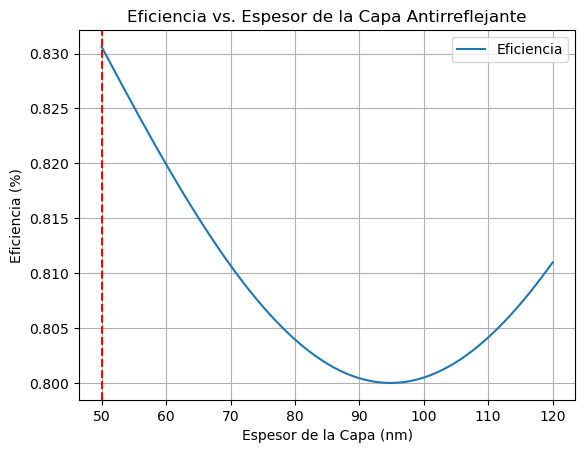

In [127]:
# Visualización de la eficiencia en función del espesor
t_values = np.linspace(t_min, t_max, 200)
valores_eficiencia = [-eficiencia(t) for t in t_values]

plt.plot(t_values, valores_eficiencia, label="Eficiencia")

plt.axvline(t_ar_opt, color='red', linestyle='--')

plt.title("Eficiencia vs. Espesor de la Capa Antirreflejante")

plt.xlabel("Espesor de la Capa (nm)")

plt.ylabel("Eficiencia (%)")

plt.legend()
plt.grid()
plt.show()



Conclusiones :

El modelo matemático utilizado proporciona una buena aproximación idealizada para analizar la interferencia óptica en capas antirreflejantes, pero sus predicciones difieren de los valores experimentales debido a su simplificación de las condiciones reales. Aunque el espesor óptimo calculado es de 50 nm, el valor experimental de 83.7 nm destaca que el modelo no incluye factores clave como defectos en el material, condiciones de fabricación y otros efectos prácticos. 
En general, estos resultados sugieren que, para obtener predicciones más cercanas a los valores experimentales, sería necesario ampliar el rango de espesores, incluir factores adicionales en el modelo y ajustar las condiciones para reflejar mejor las propiedades reales de los materiales y los procesos experimentales

Referencias 


[1] Soto, I. P. (2005). Celdas fotovoltaicas en generación distribuida. Santiago de Chile, 7.


[2] Caballero, O. J. V., Moreno, M. M., & Quintero, P. R. (2018). Estudio y Desarrollo de Celdas Solares Basadas en Estructuras de Silicio Cristalino/Silicio Amorfo Dopado (Doctoral dissertation, Instituto Nacional de Astrofísica Óptica y Electrónica).

[3] Born, M., & Wolf, E. (1999). Principles of Optics. Cambridge University Press.

[4] Green, M. A., Emery, K., Hishikawa, Y., & Warta, W. (2009). Solar cell efficiency tables (version 34). Progress in Photovoltaics: Research and Applications, 17(5), 320-326.